# Basic Test

In [1]:
from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *
from stationarity_analysis import *

# Environment Testing

In [ ]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

In [ ]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary, Initiation, No Modulation

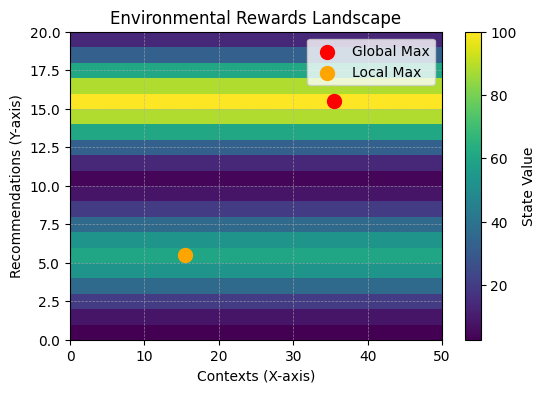

Running Simulation: 100%|██████████| 1000000/1000000 [02:57<00:00, 5634.28it/s]


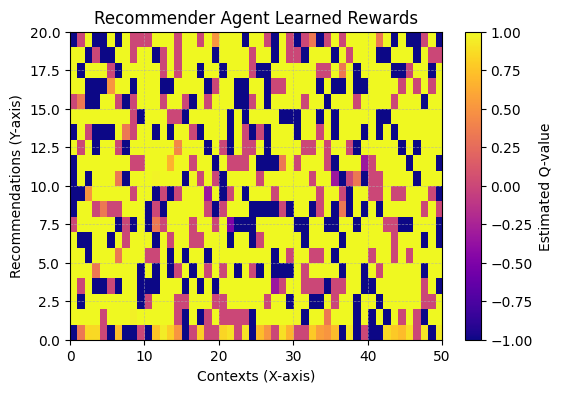

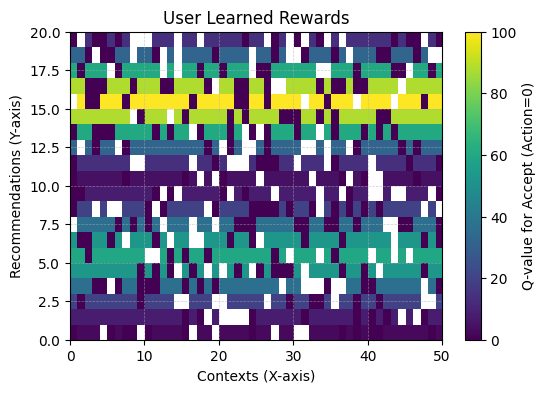

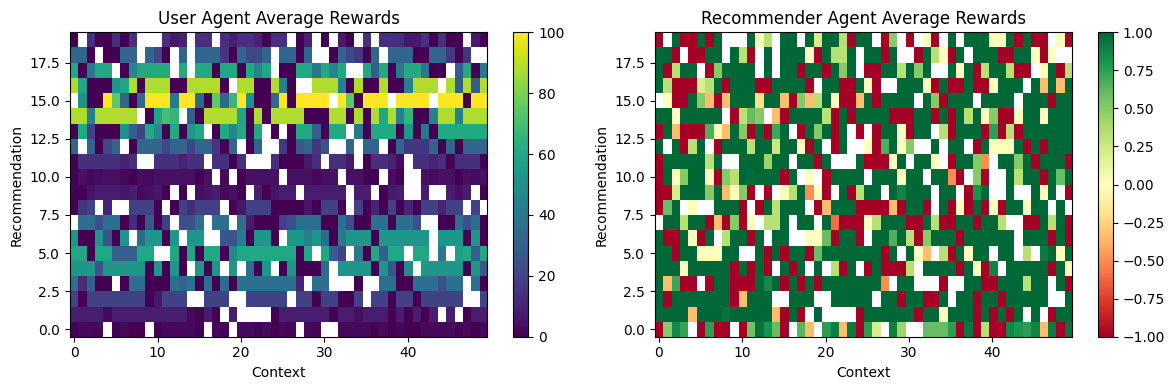

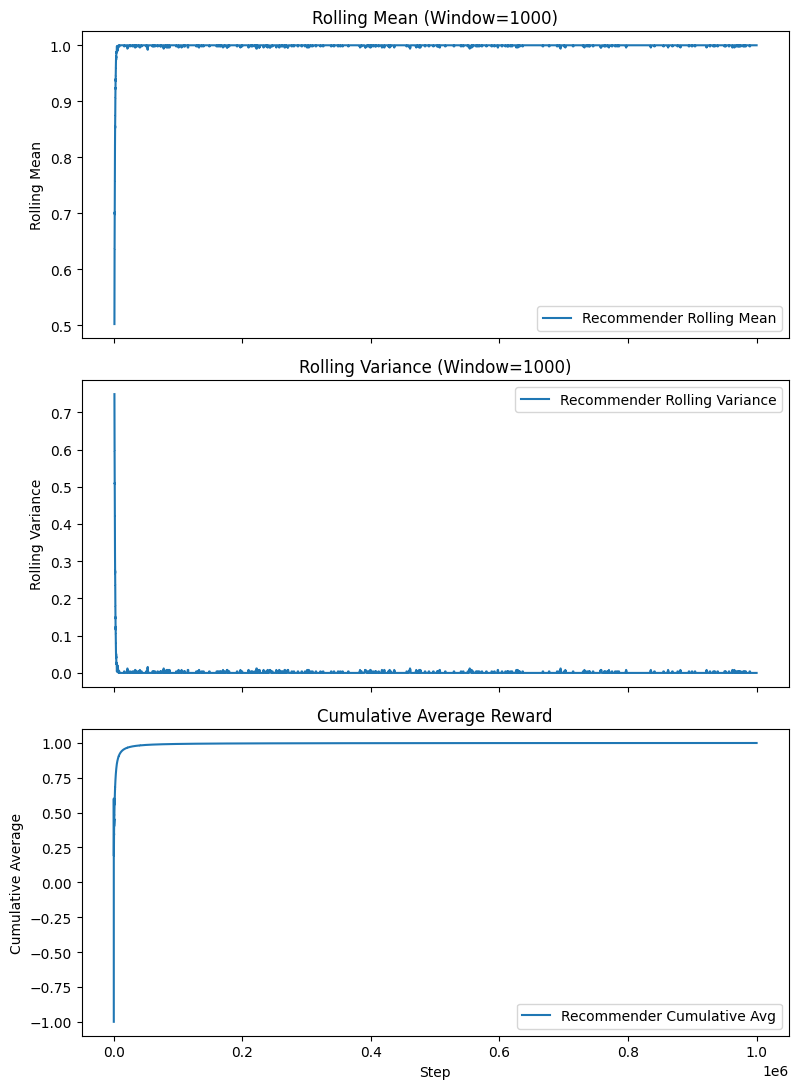

In [3]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = False,
                                    initialize_recommended = False,
                                    landscape_type='rows',
                                    stationarity=True, strategy='softmax', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]


## Stationary, Initiation, Moody Modulation

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 200000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='rows',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]


## Stationary, Initiation, Homeostatic Modulation

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=HomeostaticModulator,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 200000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='rows',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

## Stationary, Initiation, Receptor Modulation

In [7]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=ReceptorModulator,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='rows',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)
modulator = results["modulator"]
plot_sensitivity(modulator)

Running Simulation:  70%|███████   | 700124/1000000 [02:33<01:05, 4584.43it/s]

## Stationary, Initiation, Novelty Modulation

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=NoveltyModulator,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='rows',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)
modulator = results["modulator"]
plot_sensitivity(modulator,variable='novelty')